## Author:  Eli.buhbut.             Date:  2023-04-10           Version: 1.0 
    This project was made for the course "Data Mining", openu university,     
    MAMAN-21, semester 2023b.                                                 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import sklearn.tree as tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

# Global variables ------------------------------------------------------->

# 14 numerical attributes:
numAttr = ['age', 'bp',
           'bgr', 'bu', 'sc', 'sod','pot', 'hemo', 'pcv','wbcc', 'rbcc',
            'sg','al', 'su']


# 13 + 1 categorical attributes(include 'class):
catAttr = ['rbc','pc','pcc', 'ba',
           'htn','dm','cad','appet', 'pe','ane', 'class']


types_dict = {'age': float, 'bp': float, 'sg': float,
              'al': float, 'su': float, 'rbc': 'category',
              'pc': 'category', 'pcc': 'category', 'ba': 'category',
              'bgr': float, 'bu': float, 'sc': float, 'sod': float,
              'pot': float, 'hemo': float, 'pcv': float,
              'wbcc': float, 'rbcc': float, 'htn': 'category',
              'dm': 'category', 'cad': 'category',
              'appet': 'category', 'pe': 'category',
              'ane': 'category', 'class': 'category'}

# Read the original data file: 

In [6]:
# read ckd - data
df = pd.read_csv('ckd-Master.csv', dtype=types_dict)

if not  df.empty: 
        df.info() 
else: 
       print('Data not loaded')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     391 non-null    float64 
 1   bp      388 non-null    float64 
 2   sg      353 non-null    float64 
 3   al      354 non-null    float64 
 4   su      351 non-null    float64 
 5   rbc     248 non-null    category
 6   pc      335 non-null    category
 7   pcc     396 non-null    category
 8   ba      396 non-null    category
 9   bgr     356 non-null    float64 
 10  bu      381 non-null    float64 
 11  sc      383 non-null    float64 
 12  sod     313 non-null    float64 
 13  pot     312 non-null    float64 
 14  hemo    348 non-null    float64 
 15  pcv     329 non-null    float64 
 16  wbcc    294 non-null    float64 
 17  rbcc    269 non-null    float64 
 18  htn     398 non-null    category
 19  dm      398 non-null    category
 20  cad     398 non-null    category
 21  appet   399 non-

# Print daset information:


In [9]:
print( df.describe(include='all').T )
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

       count unique         top freq         mean         std     min     25%  \
age    391.0    NaN         NaN  NaN    51.483376   17.169714     2.0    42.0   
bp     388.0    NaN         NaN  NaN    76.469072   13.683637    50.0    70.0   
sg     353.0    NaN         NaN  NaN     1.017408    0.005717   1.005    1.01   
al     354.0    NaN         NaN  NaN     1.016949    1.352679     0.0     0.0   
su     351.0    NaN         NaN  NaN     0.450142    1.099191     0.0     0.0   
rbc      248      2      normal  201          NaN         NaN     NaN     NaN   
pc       335      2      normal  259          NaN         NaN     NaN     NaN   
pcc      396      2  notpresent  354          NaN         NaN     NaN     NaN   
ba       396      2  notpresent  374          NaN         NaN     NaN     NaN   
bgr    356.0    NaN         NaN  NaN   148.036517   79.281714    22.0    99.0   
bu     381.0    NaN         NaN  NaN    57.425722   50.503006     1.5    27.0   
sc     383.0    NaN         

# ckd/notckd pie chart:

<AxesSubplot: ylabel='class'>

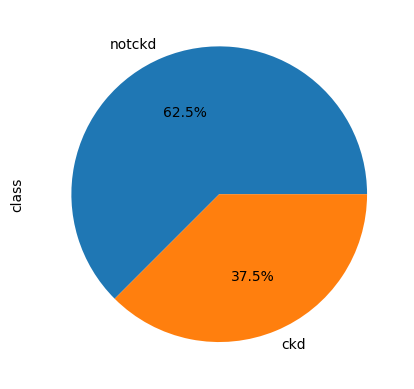

In [85]:
df['class'].value_counts().plot(kind='pie',
                                autopct='%1.1f%%'
                                , labels=['notckd', 'ckd']
                                )

# Display numeric variables distributions:

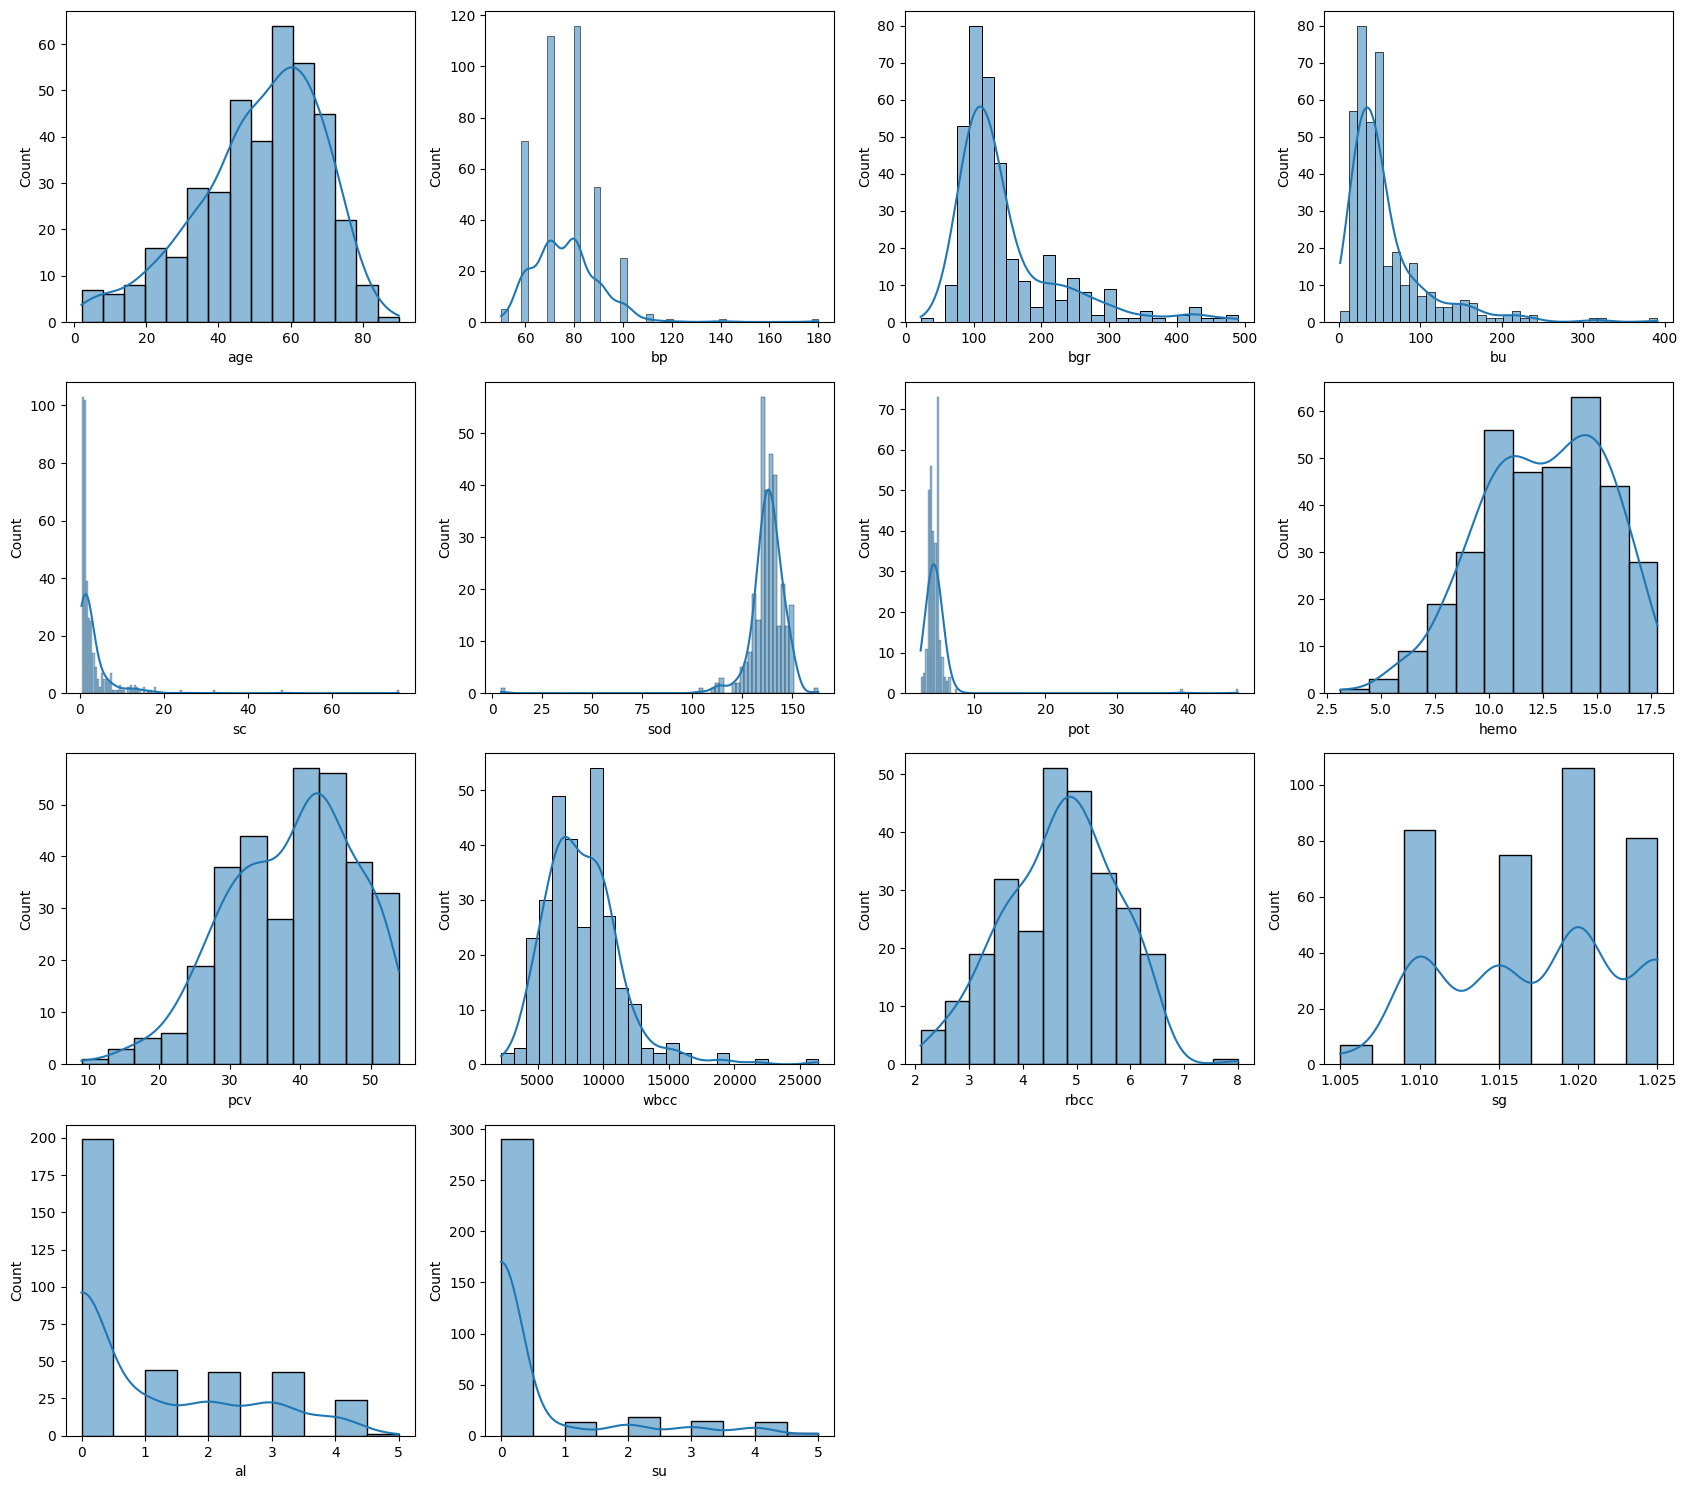

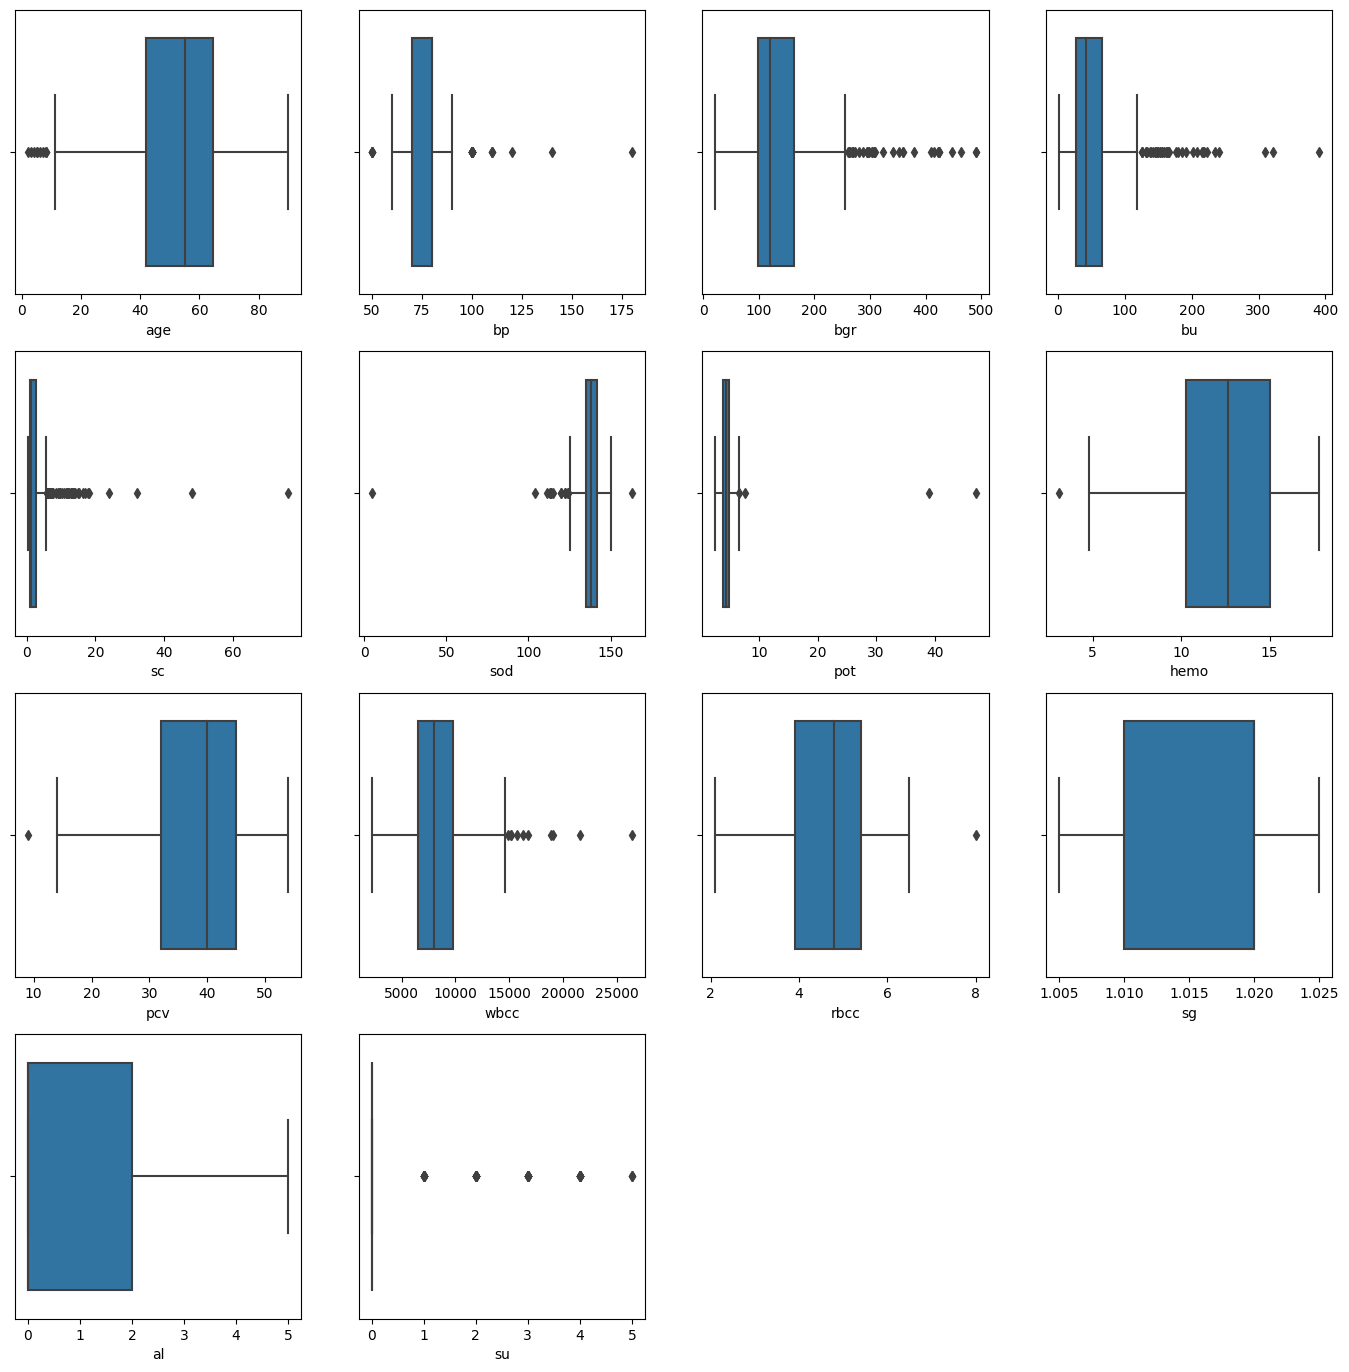

In [87]:
plt.figure(figsize=(17, 15))
for col in df[numAttr]:
    ax = plt.subplot(4, 4, numAttr.index(str(str(col)))+1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(str(col))
plt.tight_layout()
plt.show()

plt.figure(figsize=(17, 17))
for col in df[numAttr]:
    ax = plt.subplot(4, 4, numAttr.index(str(col)) + 1)
    sns.boxplot(x=df[col])
    plt.xlabel(str(col))


# Display Categoriat distributions

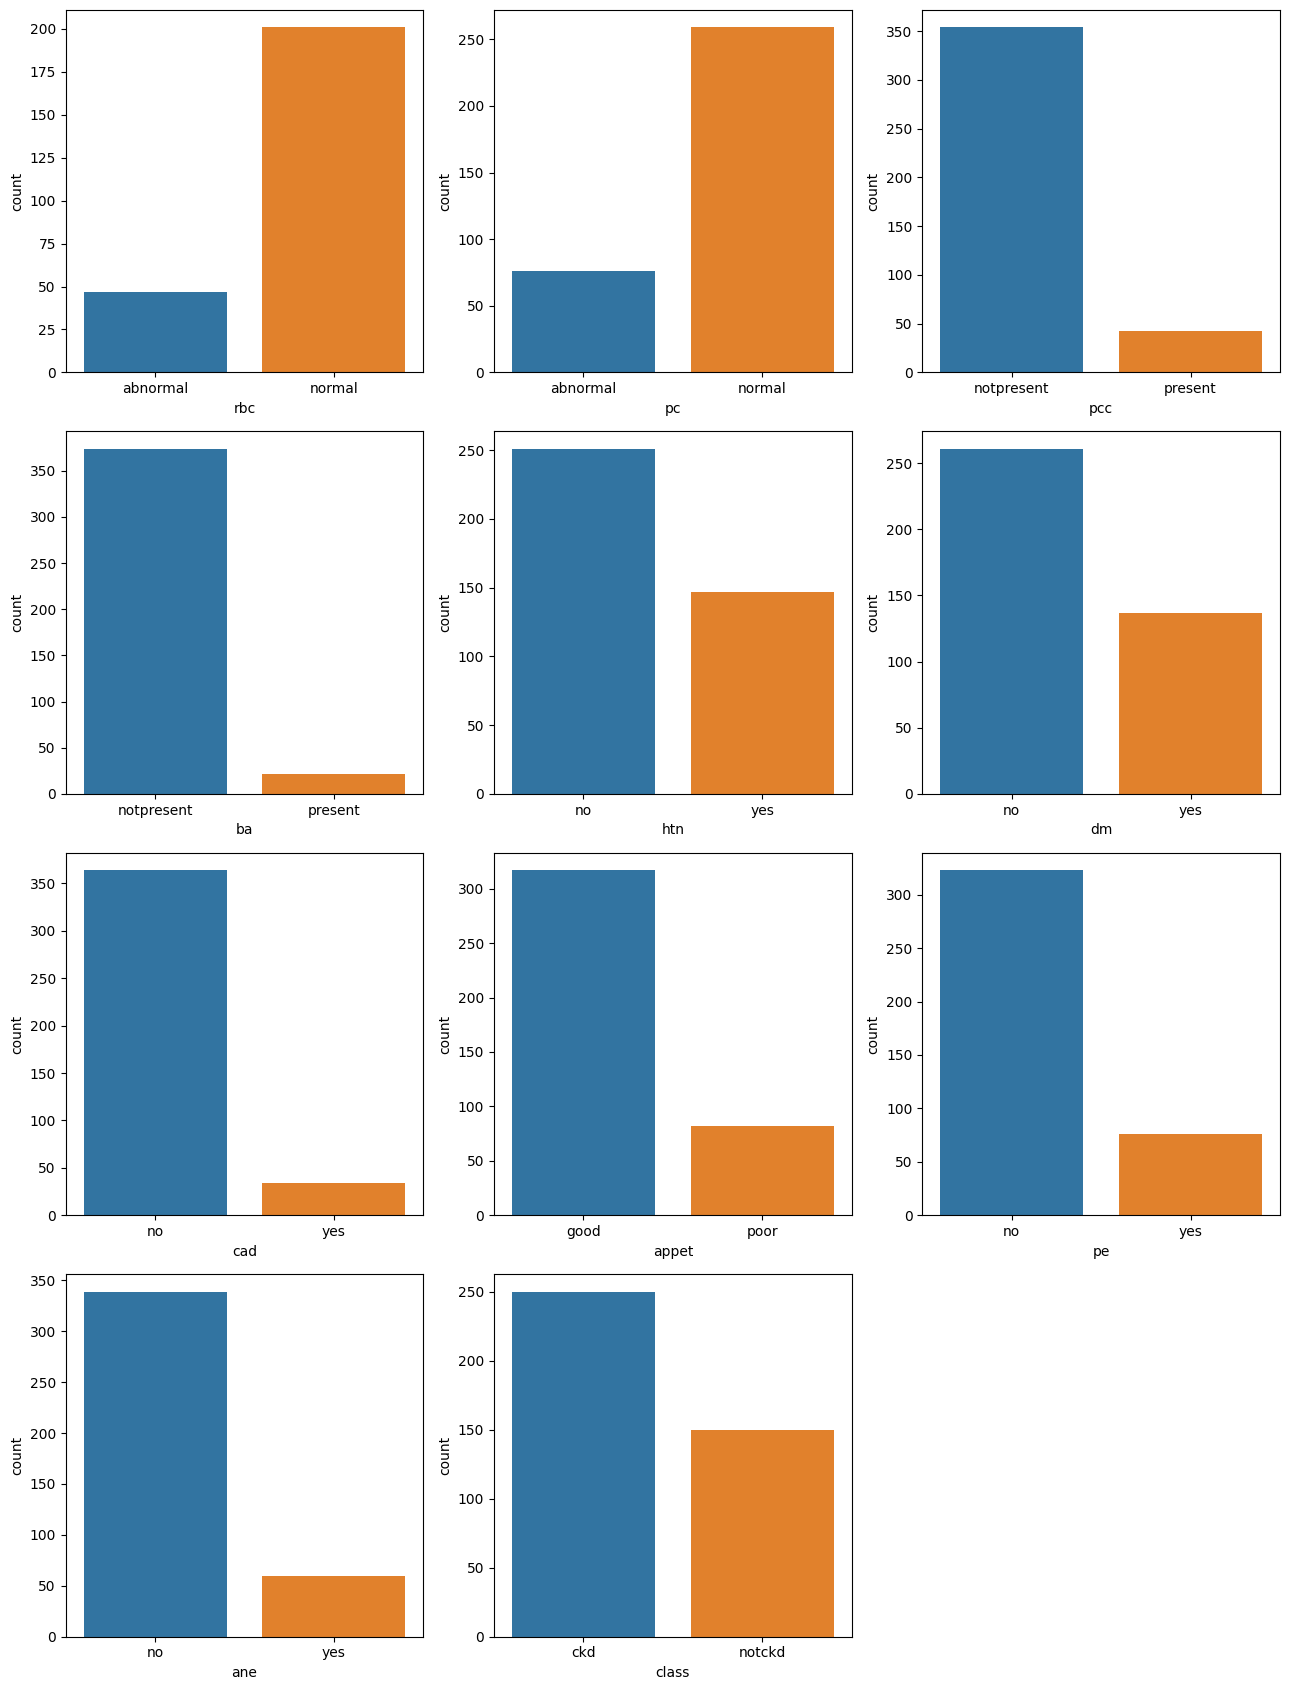

In [88]:
plt.figure(figsize=(13, 17))
for col in df[catAttr]:
    ax = plt.subplot(4, 3, catAttr.index(str(col)) + 1)

    sns.countplot(df[catAttr], x=df[col],
                 ) #hue='class'
    plt.xlabel(str(col))
plt.tight_layout()
plt.show()

# removing outliers:
## showing the distributions before/After 

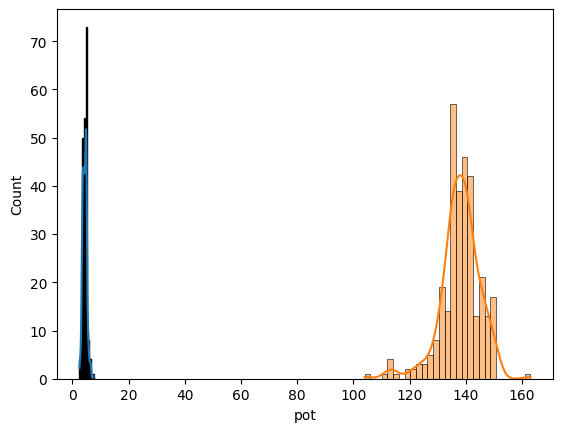

In [89]:
sns.histplot(df['pot'], kde=True)
sns.histplot(df['sod'], kde=True)
plt.show()

df['pot'].replace(39.0, 3.9, inplace=True)
df['pot'].replace(47, 4.7, inplace=True)
df['sod'].replace(4.5, np.nan, inplace=True)

# show ditribution after removing liers:
sns.histplot(df['pot'], kde=True)
sns.histplot(df['sod'], kde=True)
plt.show()


# print correlation matrix 

<AxesSubplot: >

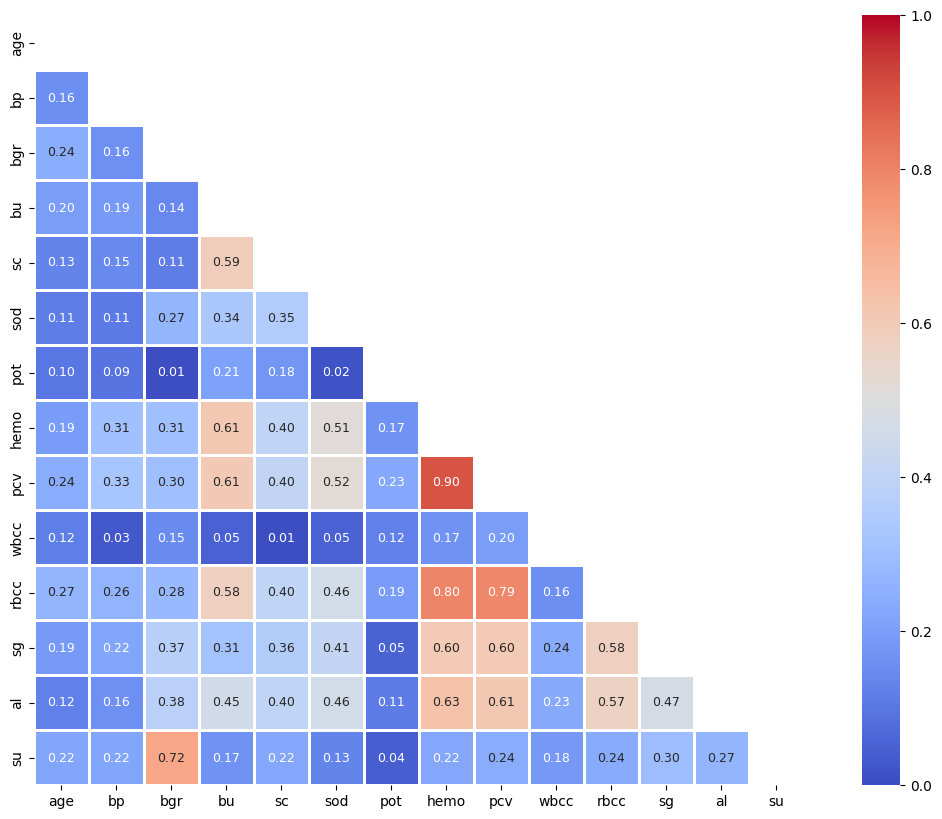

In [90]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numAttr].corr(method='pearson').abs(), annot=True
            , cmap='coolwarm' , vmin=0, vmax=1,
            square=True, linewidths=1,
            fmt='.2f', annot_kws={'size': 9},
             mask=np.triu(np.ones_like(df[numAttr].corr()))
             )

# define categorical attributes encoder function:

In [91]:
# the library "preprocessing" has a function called "LabelEncoder" that
# codes nan values to -1, so I created my own function to avoid this problem.
# ---------------------------------------------------------------------------->

def mylblEncoder(x):
    if (x == 'notckd' or
        x == 'notpresent' or
        x == 'no' or
        x == 'abnormal' or
            x == 'poor'):
        return 0
    if (x == 'ckd' or
        x == 'present' or
        x == 'yes' or
        x == 'normal' or
            x == 'good'):
        return 1
    else:
        return np.nan
# ----------------------------------------------------------------------------->
# function supports data frame only, not pd.series
# function returns X,y (dataframe, series) encoded to numerical values
# X is the data without the class attribute, y is the class attribute values

# def get_lblEncode_Cat(cat):
#     x = cat.applymap(lambda val: mylblEncoder(val))
#     y = x['class']
#     return x.drop('class', axis=1), y
# ----------------------------------------------------------------------------->


# encode: 
# X,y = get_lblEncode_Cat(df[catAttr])

df[catAttr] = df[catAttr].applymap(lambda val: mylblEncoder(val))
# return types to data frame
df = df.astype(types_dict)
df.info()


# Display missing values:

<AxesSubplot: title={'center': 'Missing values per column'}>

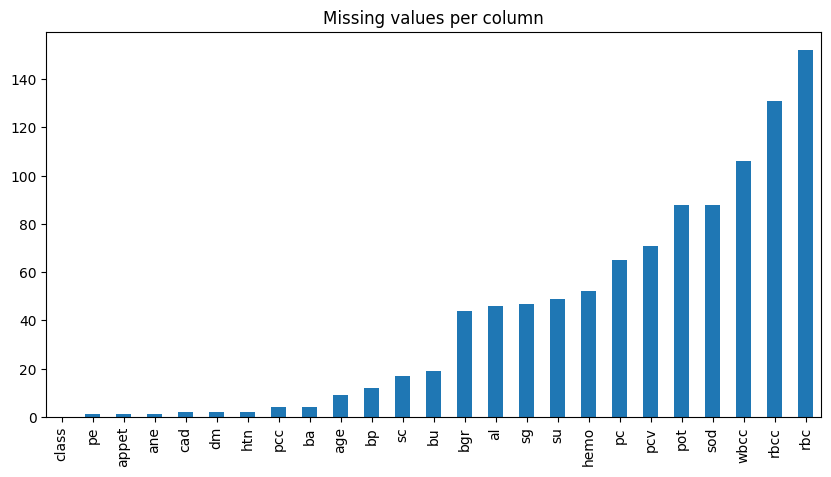

In [101]:
df.isna().sum().sort_values(ascending=True).plot(kind='bar', figsize=(10, 5),
                        title='Missing values per column')
 

# Impute missing values with the help of iterative impute, using decision tree algorithm

In [102]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
# Impute numeric:
imp_num = IterativeImputer(    estimator = DecisionTreeRegressor(),
                               initial_strategy='mean',
                               max_iter=10, random_state=0)
# Impute categories
imp_cat = IterativeImputer(    estimator = DecisionTreeClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)


In [103]:
nimpute = pd.DataFrame(imp_num.fit_transform(df[numAttr]), columns=imp_num.get_feature_names_out())

# impute Category:

cimpute = pd.DataFrame(imp_cat.fit_transform(df[catAttr].drop('class',axis=1)),columns = imp_cat.get_feature_names_out())


C:\Users\Buhbut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Buhbut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [113]:
imputeDF = nimpute.join(cimpute).join(df['class'])

In [110]:
imputeDF.isna().sum()

age      0
bp       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

# split data to train and test:
### stratied-split: (stratify=y) --> to keep the same distribution of classes

In [129]:
X = imputeDF         
y = imputeDF['class']                          

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)

## Activating ML algorithms


An example for cross validation, for future implementation:

clsf = tree.DecisionTreeClassifier( 
                                    criterion='gini',
                                    splitter='random',
                                    max_depth=3,
                                    min_samples_leaf=5,
                                    random_state=42)

TODO: perform K-Fold cross validation:

kfold = KFold(n_splits=5, shuffle=True)
v_results = cross_validate(
    estimator=clsf,
    X = X_train,
    y = y_train,
    n_jobs = 4,
    cv = kfold,
    return_estimator=True)
print("Decision tree classifier with Cross validation, k=5, score:\n%0.2f accuracy with a standard deviation of %0.2f" % (
    v_results['test_score'].mean(),
    v_results['test_score'].std(),
))


# Sklearn  Decision-tree classifier: 

Train accuracy:  0.95
Test accuracy: 0.9666666666666667
		train: 280 samples
		-----------------
              precision    recall  f1-score   support

      notckd       0.88      1.00      0.94       105
         ckd       1.00      0.92      0.96       175

    accuracy                           0.95       280
   macro avg       0.94      0.96      0.95       280
weighted avg       0.96      0.95      0.95       280

Confusion matrix: 
        notckd  ckd
notckd     105    0
ckd         14  161
		test:120 samples
		-----------------
              precision    recall  f1-score   support

      notckd       0.92      1.00      0.96        45
         ckd       1.00      0.95      0.97        75

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Confusion matrix: 
        notckd  ckd
notckd      45    0
ckd          4   71


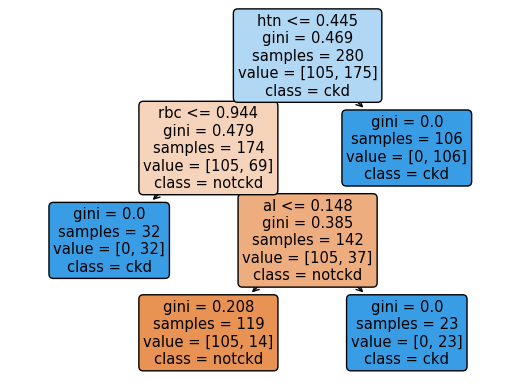

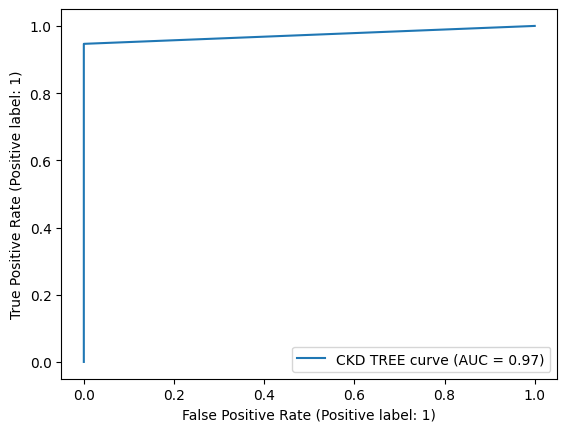

In [169]:
clsf = tree.DecisionTreeClassifier( 
                                    criterion='gini',
                                    splitter='random',
                                    max_depth=3,
                                    min_samples_leaf=5,
                                    random_state=42)

# train the model:
clsf.fit(X_train, y_train) # train the model


###############################################################################
## Important NOTE:                                                          ###
## Do NOT pass if test accuracy < train accuracy                            ###
# TODO: add a condition to stop the program if test accuracy < train accuracy #
###############################################################################
train_predicted , test_predicted = clsf.predict(X_train), clsf.predict(X_test)
# search for the best parameters: achieved test accuracy > train accuracy
# while changing the parameters:
print('Train accuracy: ', metrics.accuracy_score(y_train, train_predicted))
print('Test accuracy:', metrics.accuracy_score(y_test, test_predicted))


#visualyze the model:
_ = tree.plot_tree(
               clsf,
               feature_names = X_train.columns,
               class_names = ['notckd', 'ckd'],
               filled=True,
               rounded=True)

#  full report:

# 1. Report the accuracy of the model on the test set.
print('\t\ttrain: 280 samples\n\t\t-----------------')
print (metrics.classification_report(y_train, train_predicted
                                     , target_names=['notckd', 'ckd']))
print('Confusion matrix: ')
print( pd.DataFrame( metrics.confusion_matrix(y_train, train_predicted),
       columns=['notckd', 'ckd'], index=['notckd', 'ckd'] ))

print('\t\ttest:120 samples\n\t\t-----------------')
print (metrics.classification_report(y_test, test_predicted
                                     , target_names=['notckd', 'ckd']))
print('Confusion matrix: ')
print( pd.DataFrame( metrics.confusion_matrix(y_test, test_predicted),
       columns=['notckd', 'ckd'], index=['notckd', 'ckd'] ))

metrics.RocCurveDisplay.from_estimator(clsf, X_test, y_test, name='CKD TREE curve')

#### ROCcurve:
# y_pred = clsf.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Decision tree, AUC=" + str(auc))



# Sklearn gausian-naive-bayes classifier:


Train accuracy:  0.9678571428571429
Test accuracy:  0.9666666666666667
		train: 280 samples
		-----------------
              precision    recall  f1-score   support

      notckd       0.93      0.99      0.96       105
         ckd       0.99      0.95      0.97       175

    accuracy                           0.97       280
   macro avg       0.96      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280

Confusion matrix: 
        notckd  ckd
notckd     104    1
ckd          8  167
		test:120 samples
		-----------------
              precision    recall  f1-score   support

      notckd       0.92      1.00      0.96        45
         ckd       1.00      0.95      0.97        75

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Confusion matrix: 
        notckd  ckd
notckd      45    0
ckd          4   71


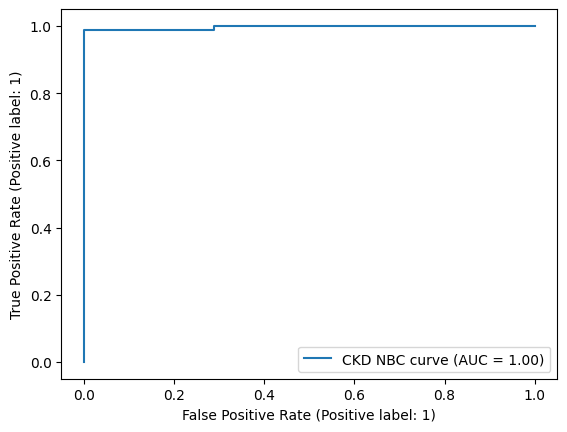

In [170]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

train_predicted , test_predicted = nbc.predict(X_train), nbc.predict(X_test)
# # search for the best parameters: achieved test accuracy > train accuracy
# # while changing the parameters:
print('Train accuracy: ', metrics.accuracy_score(y_train, train_predicted))
print('Test accuracy: ', metrics.accuracy_score(y_test, test_predicted))

#  full report:

# 1. Report the accuracy of the model on the test set.
print('\t\ttrain: 280 samples\n\t\t-----------------')
print (metrics.classification_report(y_train, train_predicted
                                     , target_names=['notckd', 'ckd']))
print('Confusion matrix: ')
print( pd.DataFrame( metrics.confusion_matrix(y_train, train_predicted),
       columns=['notckd', 'ckd'], index=['notckd', 'ckd'] ))

print('\t\ttest:120 samples\n\t\t-----------------')
print (metrics.classification_report(y_test, test_predicted
                                     , target_names=['notckd', 'ckd']))
print('Confusion matrix: ')
print( pd.DataFrame( metrics.confusion_matrix(y_test, test_predicted),
       columns=['notckd', 'ckd'], index=['notckd', 'ckd'] ))

metrics.RocCurveDisplay.from_estimator(nbc ,X_test, y_test, name='CKD NBC curve')

#### ROCcurve:
# y_pred = nbc.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="naive-base, AUC=" + str(auc))
